In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

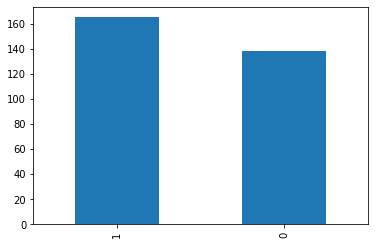

In [42]:
df['target'].value_counts().plot(kind='bar')

In [43]:
from imblearn.over_sampling import SMOTE, ADASYN

In [44]:
X, y = df.drop(columns='target'), df['target']
X.shape, y.shape

((303, 13), (303,))

In [45]:
X_resampled1, y_resampled1 = SMOTE().fit_resample(X, y)
X_resampled1.shape, y_resampled1.shape

((330, 13), (330,))

In [46]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [47]:
X_resampled2, y_resampled2 = NearMiss().fit_resample(X, y)
X_resampled2.shape, y_resampled2.shape

((276, 13), (276,))

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled2, y_resampled2, test_size=.2, random_state=0)
clf = make_pipeline(StandardScaler(), KNeighborsClassifier())
print(clf)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
cf = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])


In [52]:
print("confusion matrix:\n",cf)
print("report:\n",cr)

confusion matrix:
 [[19  7]
 [ 2 28]]
report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.80      0.93      0.86        30

    accuracy                           0.84        56
   macro avg       0.85      0.83      0.84        56
weighted avg       0.85      0.84      0.84        56



In [57]:
clf.score(Xtest, ytest) * 100

83.92857142857143